In [47]:


import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)


In [48]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
from sklearn.metrics import accuracy_score

In [49]:
import ipywidgets as widgets
import io
from PIL import Image
import tqdm
from sklearn.model_selection import train_test_split
import cv2
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from skimage.feature import canny 
from skimage import color
import matplotlib.pyplot as plt


In [50]:
img_data = []
img_labels = []
image_size = 200
labels = ['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Training',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        img_data.append(img)
        img_labels.append(i)

for i in labels:
    folderPath = os.path.join('../input/brain-tumor-classification-mri/Testing',i)
    for j in os.listdir(folderPath):
        img = cv2.imread(os.path.join(folderPath,j))
        img = cv2.resize(img,(image_size,image_size))
        img_data.append(img)
        img_labels.append(i)

img_data = np.array(img_data)
img_labels = np.array(img_labels)


img_data,img_labels = shuffle(img_data,img_labels,random_state=101)
img_data.shape

(3264, 200, 200, 3)

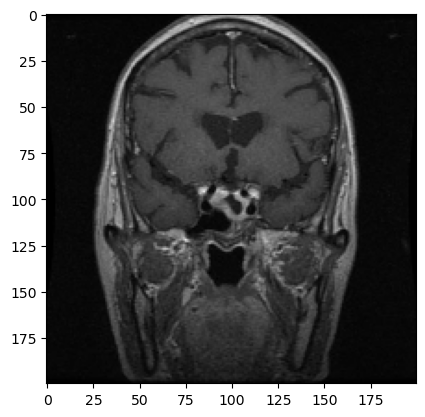

In [51]:
plt.imshow(img_data[1000])

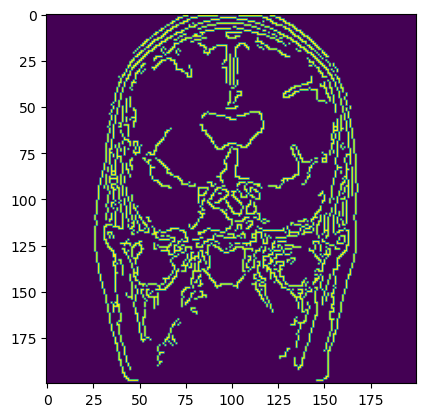

In [52]:


newData = []
for img in img_data:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)
    edge_map = np.reshape(edges, (edges.shape[0], edges.shape[1], 1))
    newData.append(edge_map)
    
    
newData = np.array(newData)
plt.imshow(newData[1000])

In [53]:
X_train,X_test,y_train,y_test = train_test_split(newData,img_labels,test_size=0.1,random_state=101)

In [54]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))
y_train=y_train_new
y_train = tf.keras.utils.to_categorical(y_train)

y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))
y_test=y_test_new
y_test = tf.keras.utils.to_categorical(y_test)

In [56]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation = 'relu',input_shape=(200,200,1)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))

In [57]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 198, 198, 64)      640       
                                                                 
 conv2d_19 (Conv2D)          (None, 196, 196, 64)      36928     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 98, 98, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 98, 98, 64)        0         
                                                                 
 conv2d_20 (Conv2D)          (None, 96, 96, 64)        36928     
                                                                 
 conv2d_21 (Conv2D)          (None, 94, 94, 64)        36928     
                                                      

In [58]:
pip install visualkeras

Note: you may need to restart the kernel to use updated packages.


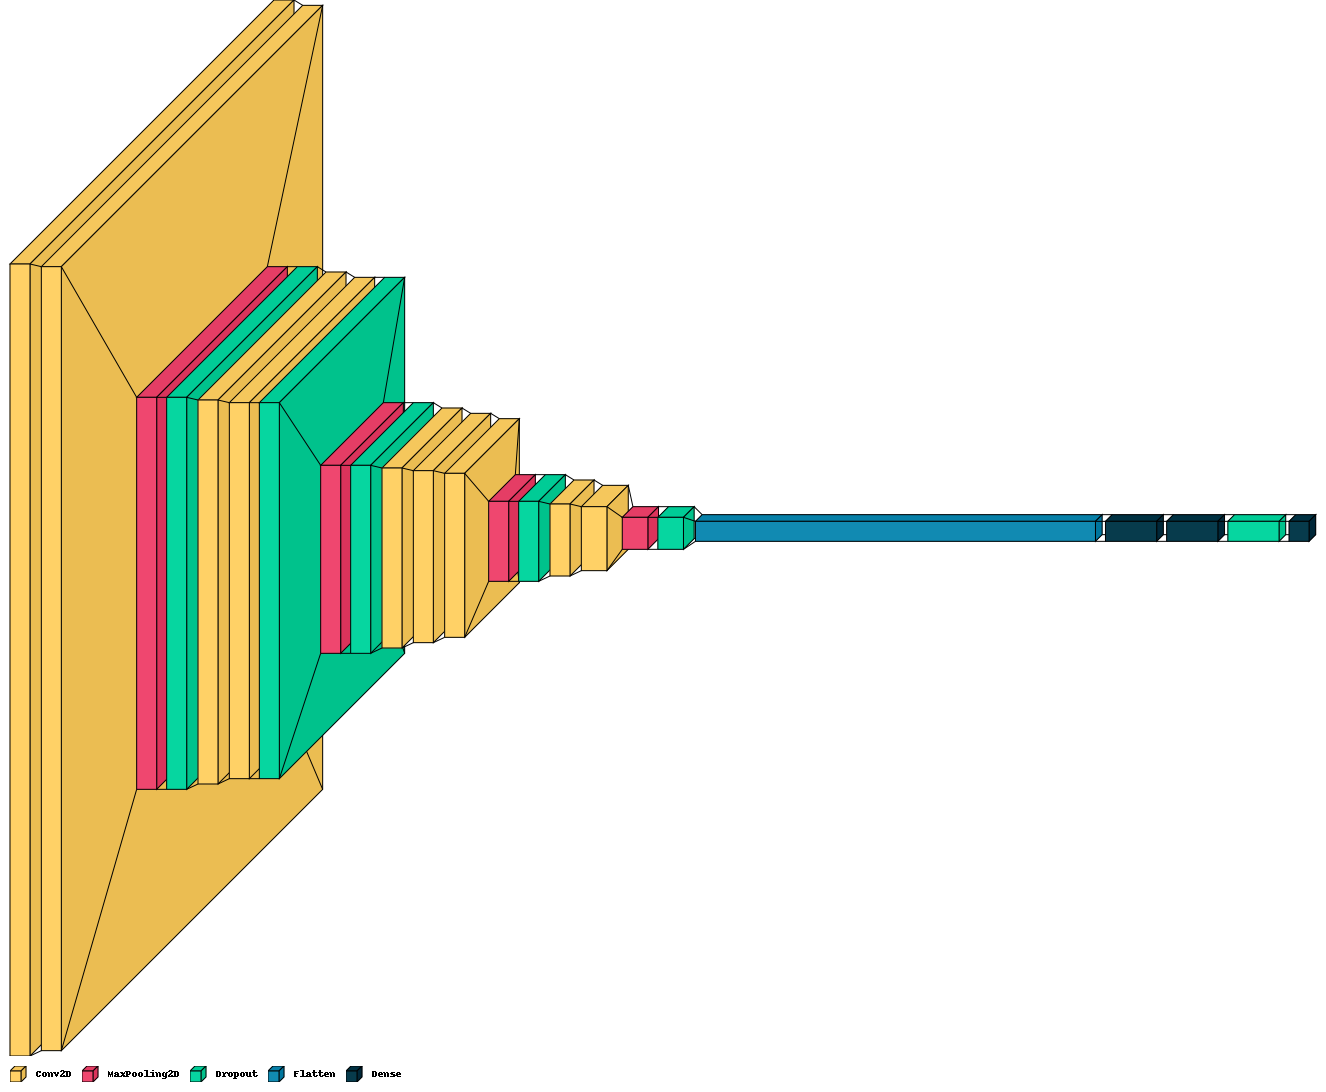

In [59]:

import visualkeras
from PIL import ImageFont
visualkeras.layered_view(model, legend=True) 


In [60]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [61]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.1)

Epoch 1/30


2023-05-20 15:42:33.096075: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_2/dropout_12/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


83/83 [==============================] - 14s 117ms/step - loss: 1.9215 - accuracy: 0.3254 - val_loss: 1.2235 - val_accuracy: 0.4014
Epoch 2/30
83/83 [==============================] - 9s 113ms/step - loss: 0.9948 - accuracy: 0.5603 - val_loss: 0.9005 - val_accuracy: 0.6156
Epoch 3/30
83/83 [==============================] - 9s 112ms/step - loss: 0.8439 - accuracy: 0.6213 - val_loss: 0.7204 - val_accuracy: 0.7007
Epoch 4/30
83/83 [==============================] - 9s 112ms/step - loss: 0.7297 - accuracy: 0.6977 - val_loss: 0.6737 - val_accuracy: 0.7041
Epoch 5/30
83/83 [==============================] - 9s 112ms/step - loss: 0.6581 - accuracy: 0.7325 - val_loss: 0.6570 - val_accuracy: 0.7279
Epoch 6/30
83/83 [==============================] - 9s 113ms/step - loss: 0.5327 - accuracy: 0.7881 - val_loss: 0.5344 - val_accuracy: 0.7959
Epoch 7/30
83/83 [==============================] - 9s 114ms/step - loss: 0.4644 - accuracy: 0.8188 - val_loss: 0.5017 - val_accuracy: 0.8231
Epoch 8/30
83/83

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

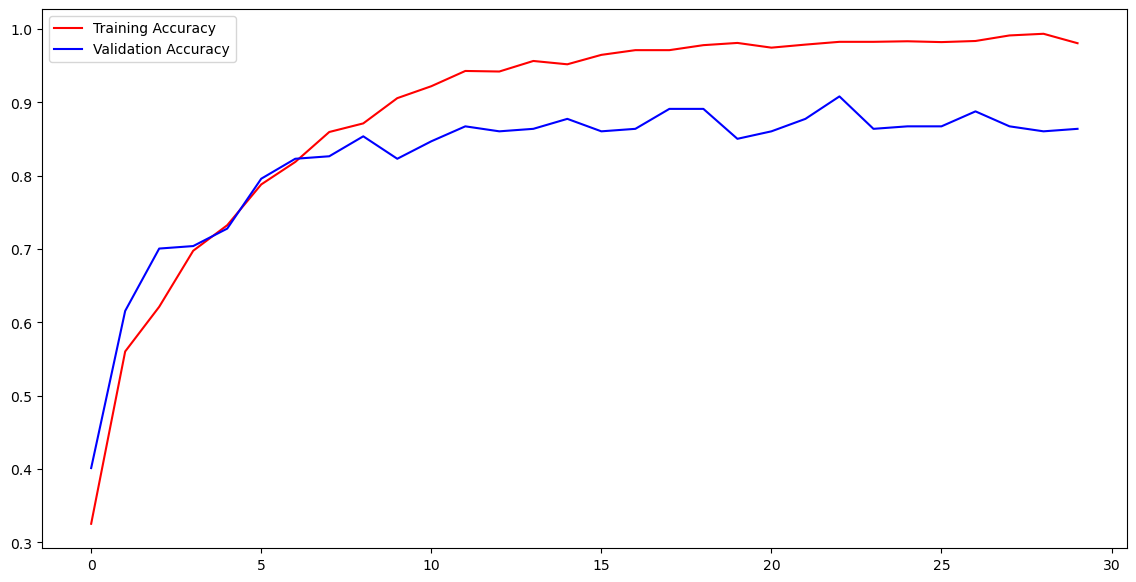

In [63]:
#model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

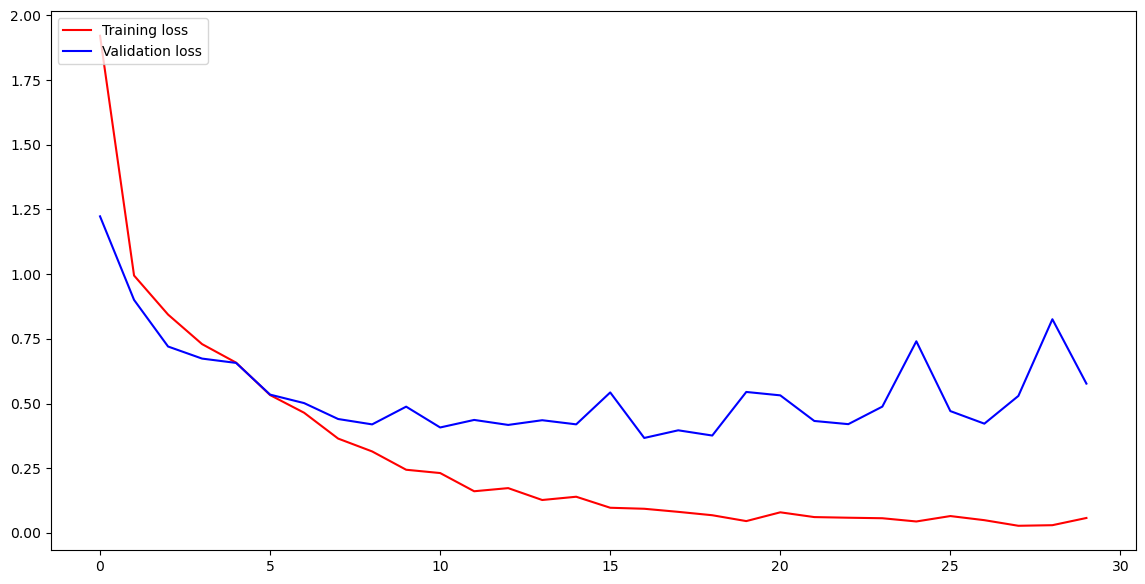

In [64]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

In [65]:
img = cv2.imread('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(200,200))
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray, 100, 200)
edge_map = np.reshape(edges, (edges.shape[0], edges.shape[1], 1))
imgToPred =np.array(edge_map)

In [66]:
imgToPred = imgToPred.reshape(1,200,200,1)
imgToPred.shape

(1, 200, 200, 1)

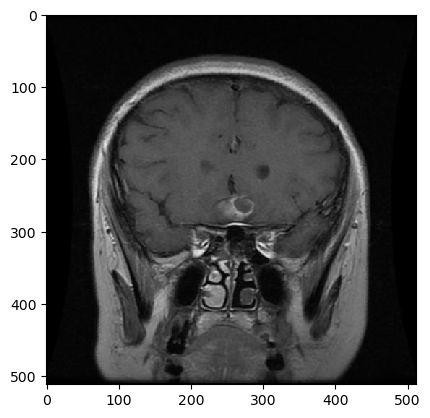

In [67]:
img = image.load_img('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [68]:
a=model.predict(imgToPred)
indices = a.argmax()
indices

1/1 [==============================] - 0s 139ms/step


3

In [69]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.6905117034912109
Test accuracy: 0.856269121170044
